In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import os, sys, getpass
user = getpass.getuser()
sys.path.append(f'/home/{user}/codes/hpe_library/')
from lib_import import *
from my_utils import *
os.chdir('/home/hrai/codes/MotionBERT')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#h36m_3d_world, h36m_cam_param = load_h36m()

In [5]:
load_folder = '/home/hrai/codes/MotionBERT/data/motion3d/h36m_gt_pkl'
save_folder = '/home/hrai/codes/MotionBERT/data/motion3d/h36m_gt_pkl_canonical_3d_same_z'
if not os.path.exists(save_folder): os.makedirs(save_folder)

In [8]:
overwrite = True
for item in tqdm(glob(load_folder + '/*.pkl')):
    save_path = item.replace('h36m_gt_pkl', 'h36m_gt_pkl_canonical_3d_same_z')
    if os.path.exists(save_path) and not overwrite: 
        print('already exists', save_path)
        continue
    data = readpkl(item)
    new_data = {}
    new_data['joint_2d_from_canonical_3d'] = []
    new_data['joint3d_image_from_canonical_3d'] = []
    new_data['world_3d_from_canonical_3d'] = []
    new_data['cam_3d_from_canonical_3d'] = []
    
    cam_param = data['cam_param'][0].reshape(1)[0].copy()
    int_mat = cam_param['intrinsic']
    ext_mat = cam_param['extrinsic']
    cam_proj = int_mat @ ext_mat
    R = ext_mat[:3, :3]
    t = ext_mat[:3, 3]
    C = T_to_C(R, t)
    num_frames = len(data['world_3d'])
    world_3d = np.array(data['world_3d']).copy() # (F, J, 3)
    cam_3d = np.array(data['cam_3d']).copy()/1000 # (F, J, 3)
    world_3d_from_canonical_3d = get_canonical_3d(world_3d, cam_3d, C, R, canonical_type='same_z')
    break

  0%|          | 0/836 [00:00<?, ?it/s]


(17, 3)


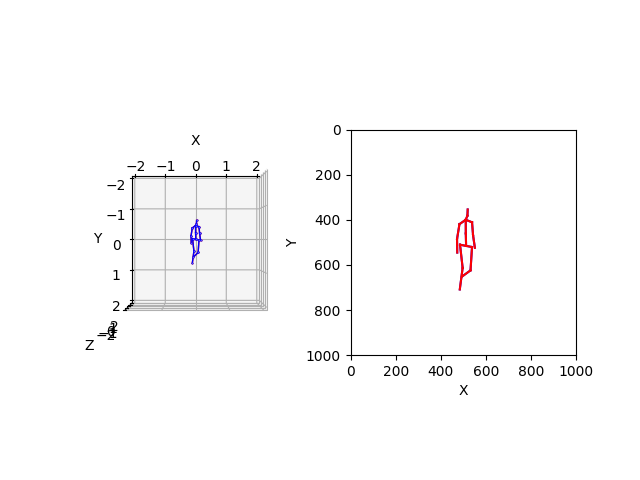

In [30]:
frame_num = 1000
cam_3d_after_canonical_3d = World2CameraCoordinate(world_3d_from_canonical_3d[frame_num].copy(), cam_param['extrinsic']) # World coordinate -> Camera coordinate
cam_3d_canonicalized = cam_3d[frame_num].copy()
print(cam_3d_canonicalized.shape)
cam_3d_canonicalized[:, :2] -= cam_3d_canonicalized[0, :2]

img_2d_after_canonical_3d = cam_3d_after_canonical_3d @ int_mat.T
img_2d_after_canonical_3d /= img_2d_after_canonical_3d[:, 2:]
img_2d_canonicalized = cam_3d_canonicalized @ int_mat.T
img_2d_canonicalized /= img_2d_canonicalized[:, 2:]

%matplotlib widget
fig = plt.figure(0)
fig.clear()
ax = axes_3d(fig, loc=121, view=(-90,-90))
#draw_3d_pose(ax, img_3d_hat/1000)
draw_3d_pose(ax, cam_3d_canonicalized, color='r')
draw_3d_pose(ax, cam_3d_after_canonical_3d, color='b')
ax2 = axes_2d(fig, loc=122, W=1000, H=1000)
draw_2d_pose(ax2, img_2d_after_canonical_3d, color='b')
draw_2d_pose(ax2, img_2d_canonicalized, color='r')
plt.show()

In [23]:
img_2d_after_canonical_3d

array([[ 512.54150496, 2729.4788308 ,    5.29531663],
       [ 537.56338483, 2744.48739389,    5.3566568 ],
       [ 534.41115762, 3256.47862459,    5.36801797],
       [ 534.03385888, 3777.0089346 ,    5.37000916],
       [ 486.9330907 , 2714.47023325,    5.23397636],
       [ 490.65486014, 3244.10808681,    5.28623262],
       [ 494.22225714, 3769.38114015,    5.29841775],
       [ 520.25833657, 2442.46938959,    5.22911944],
       [ 524.33017645, 2128.0380933 ,    5.17564378],
       [ 522.37605239, 2016.96724437,    5.21424555],
       [ 531.17462836, 1917.04746456,    5.11450002],
       [ 497.11585584, 2198.06420014,    5.13610548],
       [ 475.71714736, 2509.89017533,    5.16410312],
       [ 455.95935808, 2802.18694306,    5.24022705],
       [ 549.10965154, 2247.67287235,    5.23917713],
       [ 560.56574055, 2586.56140426,    5.3121759 ],
       [ 561.13090487, 2901.75224773,    5.42800106]])

In [9]:
overwrite = True
for item in tqdm(glob(load_folder + '/*.pkl')):
    save_path = item.replace('h36m_gt_pkl', 'h36m_gt_pkl_canonical_3d_same_z')
    if os.path.exists(save_path) and not overwrite: 
        print('already exists', save_path)
        continue
    data = readpkl(item)
    new_data = {}
    new_data['joint_2d_from_canonical_3d'] = []
    new_data['joint3d_image_from_canonical_3d'] = []
    new_data['world_3d_from_canonical_3d'] = []
    new_data['cam_3d_from_canonical_3d'] = []
    
    cam_param = data['cam_param'][0].reshape(1)[0].copy()
    int_mat = cam_param['intrinsic']
    ext_mat = cam_param['extrinsic']
    cam_proj = int_mat @ ext_mat
    R = ext_mat[:3, :3]
    t = ext_mat[:3, 3]
    C = T_to_C(R, t)
    num_frames = len(data['world_3d'])
    world_3d = np.array(data['world_3d']).copy() # (F, J, 3)
    cam_3d = np.array(data['cam_3d']).copy()/1000 # (F, J, 3)
    world_3d_from_canonical_3d = get_canonical_3d(world_3d, cam_3d, C, R, canonical_type='same_z')

    fx, fy, cx, cy = int_mat[0, 0], int_mat[1, 1], int_mat[0, 2], int_mat[1, 2]
    for frame_num in range(num_frames):
        # world to camera
        pos = world_3d_from_canonical_3d[frame_num].copy()
        cam_3d_from_canonical_3d = World2CameraCoordinate(pos, cam_param['extrinsic']) * 1000 # World coordinate -> Camera coordinate
        cam_3d_from_canonical_3d_hat = get_rootrel_pose(cam_3d)
        
        # camera to image
        box = infer_box(cam_3d_from_canonical_3d, {'fx': fx, 'fy': fy, 'cx': cx, 'cy': cy}, 0)
        img_2d_from_canonical_3d, img_3d_from_canonical_3d = camera_to_image_frame(cam_3d_from_canonical_3d, box, {'fx': fx, 'fy': fy, 'cx': cx, 'cy': cy}, 0) 
        img_3d_from_canonical_3d_hat = get_rootrel_pose(img_2d_from_canonical_3d) # (17, 3) # root-relative pose  
        
        # 2.5d factor
        #pred_lambda, losses = optimize_scaling_factor(img_3d_hat, cam_3d_hat) # x,y,z 사용
        
        # joint 2.5d image
        #img_25d = img_3d * pred_lambda
    
        # store
        new_data['joint_2d_from_canonical_3d'].append(np.array(img_2d_from_canonical_3d).copy())
        new_data['joint3d_image_from_canonical_3d'].append(np.array(img_3d_from_canonical_3d).copy())
        new_data['cam_3d_from_canonical_3d'].append(np.array(cam_3d_from_canonical_3d).copy())
    
    new_data['joint_2d'] = data['joint_2d'].copy()
    new_data['confidence'] = data['confidence'].copy()
    new_data['camera_name'] = data['camera_name'].copy()
    new_data['action'] = data['action'].copy()
    new_data['source'] = data['source'].copy()
    new_data['frame'] = data['frame'].copy()
    new_data['world_3d'] = data['world_3d'].copy()
    new_data['world_3d_from_canonical_3d'] = list(world_3d_from_canonical_3d)
    new_data['cam_3d'] = data['cam_3d'].copy()
    new_data['cam_param'] = data['cam_param'].copy()
    savepkl(new_data, save_path)
    #break

100%|██████████| 836/836 [19:02<00:00,  1.37s/it]


In [13]:
new_data.keys() - data.keys()

{'cam_3d_from_canonical_3d',
 'joint3d_image_from_canonical_3d',
 'joint_2d_from_canonical_3d',
 'world_3d_from_canonical_3d'}

NameError: name 'img_3d_hat' is not defined

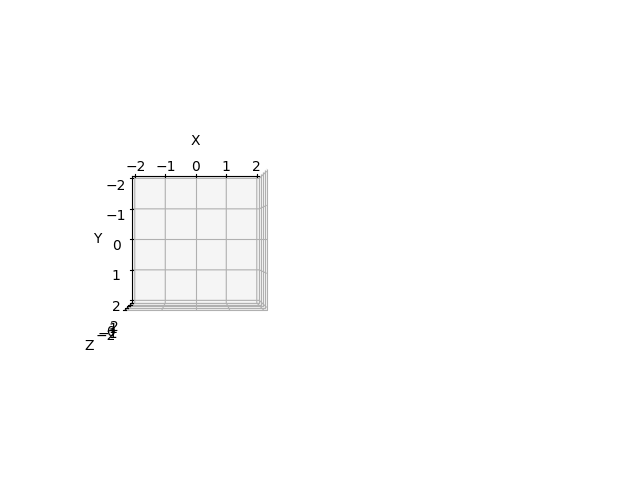

In [14]:
%matplotlib widget
fig = plt.figure(0)
fig.clear()
ax = axes_3d(fig, loc=121, view=(-90,-90))
draw_3d_pose(ax, img_3d_hat/1000)
draw_3d_pose(ax, cam_3d_hat/1000, color='r')
ax2 = axes_2d(fig, loc=122, W=1000, H=1000)
draw_2d_pose(ax2, data['joint_2d_from_canonical_3d'][frame_num])
plt.show()